# Random Forest OOB Errors

The RandomForestClassifier is trained using bootstrap aggregation, where each new tree is fit from a bootstrap sample of the training observations $z_i = (x_i, y_i)$. **The out-of-bag (OOB) error is the average error for each $z_i$ calculated using predictions from the trees that do not contain $z_i$ in their respective bootstrap sample.** This allows the RandomForestClassifier to be fit and validated whilst being trained [1].

The example below demonstrates how the OOB error can be measured at the addition of each new tree during training. The resulting plot allows a practitioner to approximate a suitable value of n_estimators at which the error stabilizes.

[1] T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, p592-593, Springer, 2009.



In [1]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 0

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Generate Data

In [3]:
# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

### Train Models and Plot Results

In [4]:
RandomForestClassifier()

RandomForestClassifier()

max_features : {"auto", "sqrt", "log2"}, int or float, default="auto"
    The number of features to consider when looking for the best split:

   - If int, then consider `max_features` features at each split.
   - If float, then `max_features` is a fraction and
      `round(max_features * n_features)` features are considered at each
      split.
   - If "auto", then `max_features=sqrt(n_features)`.
   - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
   - If "log2", then `max_features=log2(n_features)`.
   - If None, then `max_features=n_features`.

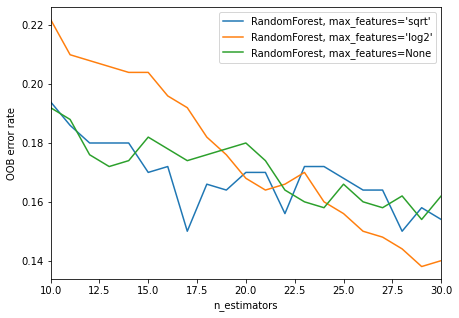

In [7]:
# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForest, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForest, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForest, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 30

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

plt.figure(figsize=[7,5])
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)


plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

- Exercise: 
Increase the number of estimators above and see if the compariosn between the different max number of feature selection methods still hold.   
For example try `max_estimators=200`

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

Credit:
-         Kian Ho <hui.kian.ho@gmail.com>
-         Gilles Louppe <g.louppe@gmail.com>
-         Andreas Mueller <amueller@ais.uni-bonn.de>

In [5]:
RandomForestClassifier()

RandomForestClassifier()